### Import the Libraries/Packages needed

In [1]:
import h5py
import numpy as np
from keras import layers
from keras.layers import Input, Dense, ZeroPadding2D, BatchNormalization, Conv2D, Flatten, Activation, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
%matplotlib inline

Using TensorFlow backend.


### Load dataset

In [2]:
# Dataset for training
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")

# Dataset for testing
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")

### Check the schema of the datasets

In [3]:
# Check the schema of the dataset
train_data = np.array(train_dataset)
test_data = np.array(test_dataset)

print("Training data files ",train_data)
print("Testing data files " ,test_data)

Training data files  ['list_classes' 'train_set_x' 'train_set_y']
Testing data files  ['list_classes' 'test_set_x' 'test_set_y']


### Separate features and labels data

In [4]:
X_train_orig = np.array(train_dataset["train_set_x"][:]) # train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

X_test_orig = np.array(test_dataset["test_set_x"][:]) # test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

### Normalize and reshape 

In [5]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.reshape((1, Y_train_orig.shape[0])).T
Y_test = Y_test_orig.reshape((1, Y_test_orig.shape[0])).T

### Details of the data

In [6]:
# Details of Data
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 209
number of test examples = 50
X_train shape: (209, 64, 64, 3)
Y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
Y_test shape: (50, 1)


### Define the model

In [7]:
def CatModel(input_shape):
  
    # Define the input placeholder as a tensor with shape input_shape. Think of this
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model. This creates your Keras model instance, you'll use this instance
    model = Model(inputs = X_input, outputs = X, name='CatModel')
    
    return model

### Train the model using train data

In [8]:
catModel = CatModel(input_shape=(64,64,3))

In [9]:
catModel.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [10]:
catModel.fit(x=X_train, y=Y_train, batch_size=60, epochs=100)

Epoch 1/100
209/209 [==============================] - 5s 25ms/step - loss: 4.1739 - accuracy: 0.4785
Epoch 2/100
209/209 [==============================] - 5s 22ms/step - loss: 5.8824 - accuracy: 0.6555
Epoch 3/100
209/209 [==============================] - 4s 20ms/step - loss: 2.8244 - accuracy: 0.6794
Epoch 4/100
209/209 [==============================] - 4s 19ms/step - loss: 2.6093 - accuracy: 0.4402
Epoch 5/100
209/209 [==============================] - 4s 20ms/step - loss: 1.3028 - accuracy: 0.7225
Epoch 6/100
209/209 [==============================] - 4s 20ms/step - loss: 1.0588 - accuracy: 0.7225
Epoch 7/100
209/209 [==============================] - 4s 20ms/step - loss: 0.7875 - accuracy: 0.7464
Epoch 8/100
209/209 [==============================] - 4s 19ms/step - loss: 0.4865 - accuracy: 0.8182
Epoch 9/100
209/209 [==============================] - 4s 20ms/step - loss: 0.4277 - accuracy: 0.8469
Epoch 10/100
209/209 [==============================] - 4s 20ms/step - loss: 0.445

209/209 [==============================] - 4s 20ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 81/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 82/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 83/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 84/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 85/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 86/100
209/209 [==============================] - 4s 19ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 87/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 88/100
209/209 [==============================] - 4s 20ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 89/100
209/209 [==============================] - 4s 19ms/step - loss: 0.0064 - 

### Evaluate the model using test data

In [11]:
preds = catModel.evaluate(x=X_test, y=Y_test, batch_size=150)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

50/50 [==============================] - 0s 8ms/step

Loss = 0.693065881729126
Test Accuracy = 0.8199999928474426


For test data, we got **0.8199** or **82%** accuracy

### Use the model to predict other pictures

In [12]:
def isCat(img_path):
    
    img = image.load_img(img_path, target_size=(64, 64))
    imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    p = catModel.predict(x)

    print (p)

    if str(p)=='[[1.]]':
        print("This is a cat")
    elif str(p)=='[[0.]]':
        print("This is not a cat")
    
    return

First let's use the cat picture to know how accurate this model.

[[1.]]
This is a cat


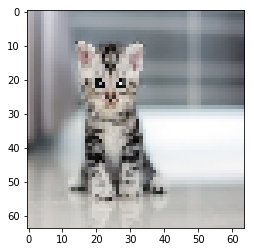

In [13]:
isCat(img_path='images/cats-1.jpg')

The model works well for this picture. The cat picture is recognized as a cat. 

Now let's use non-cat pictures.

[[0.]]
This is not a cat


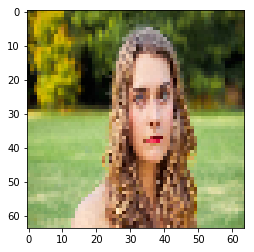

In [14]:
isCat(img_path='images/women-1.jpg')

The woman picture is known as non-cat. Cool!

[[0.]]
This is not a cat


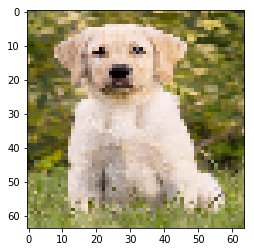

In [15]:
isCat(img_path='images/dog-1.jpg')

The dog picture is classified as a non-cat as well. 

[[1.]]
This is a cat


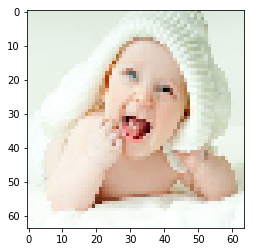

In [16]:
isCat(img_path='images/baby-1.jpg')

Unfortunately, the smiling baby picture is classified as a cat.

[[0.]]
This is not a cat


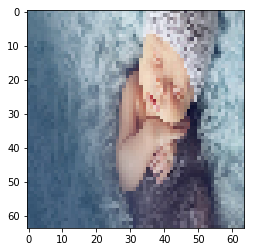

In [17]:
isCat(img_path='images/baby-2.jpg')

It works well for this sleeping baby picture. The picture is recognized as non-cat. Good!

[[0.]]
This is not a cat


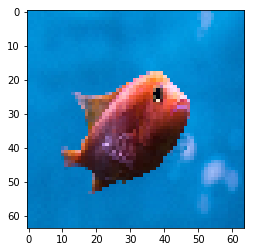

In [18]:
isCat(img_path='images/fish-1.jpg')

[[0.]]
This is not a cat


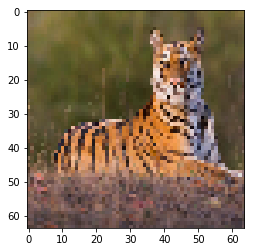

In [19]:
isCat(img_path='images/tiger-1.jpg')

For the two last pictures, fish and tiger, it also works well, classifying them as non-cat.